In [918]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Homework 1
### Problem 1

In [919]:
### Part a) ###
Data = np.random.normal(0,1,100)
noise = np.random.normal(0,1,100)

Response = 2 + Data + 3*Data**2 - 0.5*Data**3 + noise

Df = pd.DataFrame({'X':Data, 'Y':Response})

In [920]:
import statsmodels.api as sm
import time
import itertools


#### part b)

In [921]:
# Found on google

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    # X = 
    model = sm.OLS(Df['Y'], sm.add_constant(Df[list(feature_set)]))
    regr = model.fit()
    RSS = ((regr.predict((sm.add_constant(Df[list(feature_set)])) ) - Df['Y'])**2).sum()
    # print(regr.summary())
    return {"model":regr, "RSS":RSS}

def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(Df.loc[:, Df.columns != 'Y'].columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [922]:
for i in range(2, 11):
    Df['X^'+str(i)] = Data**i # add columns for each power of X

In [923]:
#Also from google
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(11):
    models_best.loc[i] = getBest(i)
 
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")



Processed 1 models on 0 predictors in 0.06199216842651367 seconds.
Processed 10 models on 1 predictors in 0.12296772003173828 seconds.


Processed 45 models on 2 predictors in 0.6786043643951416 seconds.
Processed 120 models on 3 predictors in 1.4789071083068848 seconds.
Processed 210 models on 4 predictors in 2.9694759845733643 seconds.
Processed 252 models on 5 predictors in 3.9869558811187744 seconds.
Processed 210 models on 6 predictors in 3.664987802505493 seconds.
Processed 120 models on 7 predictors in 2.4615323543548584 seconds.
Processed 45 models on 8 predictors in 0.8203694820404053 seconds.
Processed 10 models on 9 predictors in 0.18055081367492676 seconds.
Processed 1 models on 10 predictors in 0.02037191390991211 seconds.
Total elapsed time: 16.50820016860962 seconds.


In [924]:
models_best.apply(lambda row: row[1].params, axis=1) # get the parameters of the best model for each number of predictors


,X,X^10,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9,const
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.840191
1,NaN,NaN,3.176949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.629781
2,NaN,NaN,2.748088,NaN,NaN,NaN,NaN,-0.005252,NaN,NaN,1.988050
3,1.239678,NaN,3.007395,-0.527618,NaN,NaN,NaN,NaN,NaN,NaN,1.839114
4,1.202926,NaN,2.988463,-0.507161,NaN,NaN,NaN,NaN,NaN,-0.000028,1.850427
5,1.520550,NaN,2.908608,-1.007375,NaN,0.160486,NaN,-0.012204,NaN,NaN,1.875639
6,1.950324,NaN,3.045469,-1.916154,NaN,0.550606,-0.022156,-0.050106,NaN,NaN,1.809179
7,1.889092,-0.000355,3.159910,-1.694685,-0.098333,0.367897,NaN,NaN,NaN,-0.004136,1.792437
8,1.960066,-0.013852,3.663438,-2.123016,NaN,0.799468,-0.459798,-0.116595,0.164171,NaN,1.693633
9,2.063281,-0.030314,2.610641,-2.461511,1.849421,1.083937,-1.537801,-0.177622,0.404427,NaN,1.787348


For k=3 we have X, X^2 and X^3 as expected from simulating y. Even the coefficients are close to the expected values.  

### Part c)

In [925]:
rsquare = models_best.apply(lambda row: row[1].rsquared_adj, axis=1) # get the R^2 of the best model for each number of predictors
bic = models_best.apply(lambda row: row[1].bic, axis=1) # get the BIC of the best model for each number of predictors
aic = models_best.apply(lambda row: row[1].aic, axis=1) # get the Mallow's Cp of the best model for each number of predictors
# print(rsquare)
# print(dir(models_best.loc[2, "model"]))


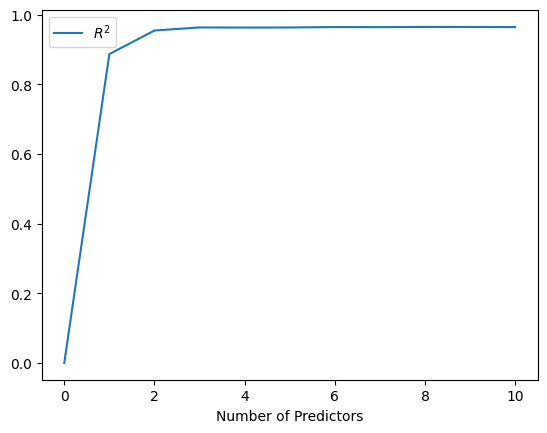

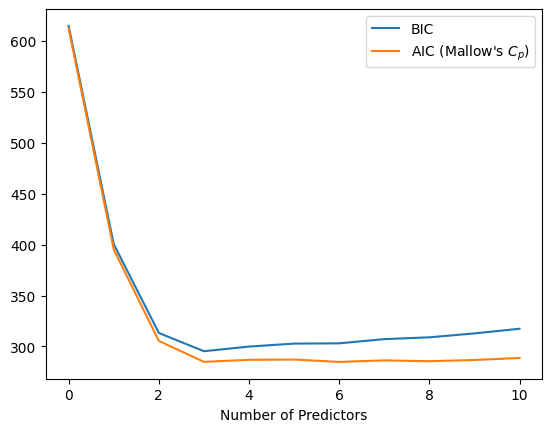

In [926]:
plt.plot(rsquare, label="$R^2$")
plt.legend()
plt.xlabel('Number of Predictors')
plt.show()

plt.plot(bic, label="BIC")
plt.plot(aic, label="AIC (Mallow's $C_p$)")
plt.legend()
plt.xlabel('Number of Predictors');

In [927]:
print(bic.idxmin()) #Finds where minimum  and maximum values are
print(aic.idxmin())
print(rsquare.idxmax())

print(rsquare.max()) #To compare k=4 and k=3
print(rsquare[3])


3
6
8
0.9644813712442187
0.9630183390452486


Since the r-squared values for k=3 and k=4 are very close, we can conclude that the model with 3 predictors is best.

In [928]:
#coefficients of k=3
print(models_best.loc[3, "model"].params)

const    1.839114
X        1.239678
X^2      3.007395
X^3     -0.527618
dtype: float64


They are fairly close to the correct result of (in order): 2, 1, 3, -0.5, as expected.

#### part d)

In [929]:
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
    (Stepwise,
     sklearn_selected,
     sklearn_selection_path)
from l0bnb import fit_path

In [930]:
### From the ISLP book ###
def nCp(sigma2, estimator, X, Y): #Cp is negative, since sklearn tries to maximize the score, but we want to minimize Cp
    "Negative Cp Statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n
    

In [931]:
### From the ISLP book ###
design = MS(Df.columns.drop('Y')).fit(Df)
Y = np.array(Df['Y'])
X = design.transform(Df)
sigma2 = OLS(Y, X).fit().scale
neg_Cp = partial(nCp, sigma2)

strategy = Stepwise.first_peak(design,
                               direction = 'forward',
                               max_terms = len(design.terms))

In [932]:
#Forward selection using MSE
Y_MSE = sklearn_selected(OLS, strategy)
Y_MSE.fit(Df, Y)
Y_MSE.selected_state_

('X', 'X^10', 'X^2', 'X^3', 'X^4', 'X^5', 'X^6', 'X^7', 'X^8', 'X^9')

In [933]:
#Forward selection using Cp
Y_Cp = sklearn_selected(OLS,
                        strategy,
                        scoring = neg_Cp)
Y_Cp.fit(Df, Y)
Y_Cp.selected_state_

('X', 'X^2', 'X^3', 'X^7')

In [934]:
#We repeat the same, but in the backwards direction
strategy = Stepwise.first_peak(design,
                                 direction = 'backwards',
                                 max_terms = len(design.terms))

In [935]:
#Forward selection using MSE
Y_MSE = sklearn_selected(OLS, strategy)
Y_MSE.fit(Df, Y)
Y_MSE.selected_state_

('X', 'X^10', 'X^2', 'X^3', 'X^4', 'X^5', 'X^6', 'X^7', 'X^8', 'X^9')

In [936]:
#Backwards selection using Cp
Y_Cp = sklearn_selected(OLS,
                        strategy,
                        scoring = neg_Cp)
Y_Cp.fit(Df, Y)
Y_Cp.selected_state_

('X', 'X^2', 'X^3')

#### part d)

In [937]:
#p287 ISLP
kfold = skm.KFold(5, random_state = 0, shuffle = True)
scaler = StandardScaler(with_mean = True, with_std = True)
lassoCV = skl.ElasticNetCV(n_alphas = 100,
                           l1_ratio = 1,
                           cv = kfold)
pipeCV = Pipeline(steps = [('scaler', scaler),
                            ('lasso', lassoCV)])  
pipeCV.fit(X,Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

0.013692808116355839

In [938]:
%%capture
##^^ suppresses output, I get lots of warnings otherwise
D = design.fit_transform(Df)
X = np.asarray(D)
Xs = X - X.mean(0)[None, :]
# X_scale = X.std(0)
# Xs = np.nan_to_num(Xs / X_scale[None, :])
# np.nan_to_num(Xs, copy = False)
Y = np.array(Df['Y'])

lambdas, soln_array = skl.Lasso.path(Xs,
                                     Y,
                                     l1_ratio = 1,
                                     n_alphas = 100)[:2]

soln_path = pd.DataFrame(soln_array.T,
                         columns = D.columns,
                         index = -np.log(lambdas))

In [939]:
np.min(tuned_lasso.mse_path_.mean(1)) #Lowest MSE

1.0853450531163946

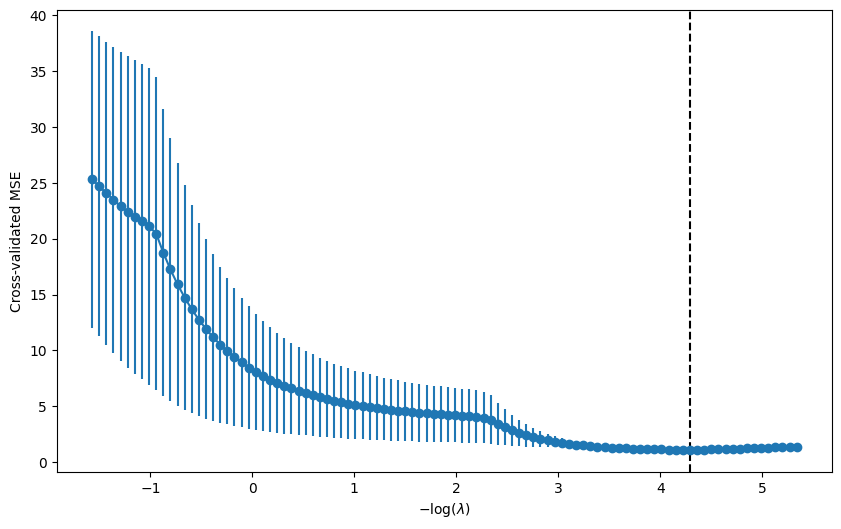

In [940]:
lassoCV_fig, ax = plt.subplots(figsize = (10,6))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr = tuned_lasso.mse_path_.std(1) / np.sqrt(5),
            fmt = '-o')
ax.axvline(-np.log(tuned_lasso.alpha_),
            color = 'k',
            linestyle = '--')
ax.set_xlabel(r'$-\log(\lambda)$')
ax.set_ylabel('Cross-validated MSE');
# path_fig, ax = plt.subplots(figsize = (8,8))
# soln_path.plot(ax = ax, legend = False)
# ax.legend(loc = 'upper left')
# ax.set_xlabel(r'$-\log(\lambda)$', fontsize = 20)
# ax.set_ylabel('Standardized Coefficients', fontsize = 20);

The lasso model actually uses more predictors than forward and backwards stepwise selection.

## Problem 2

#### part a)
I expect rigde regression to have a lower training RSS than lasso, since lasso tends to 'snap' coefficients to zero, while ridge does not, and ridge can, perhapse, overfit the data and obtain a lower training RSS. Again, the same can be said for forward and backward stepwise selection, since they have the ability to fit the data, as much as possible. \
They could theoretically tie, especially if most predictors are not useful, and therefore zero. Although this is unlikely. \
Wether some models outperform others depends on the data and the underlying model. If you have lots of non-noisy data, forwards/backwards stepwise selection could be the best, since they can fit the data as much as possible, but if you have noisy data, lasso could be the best, since it can 'snap' coefficients to zero, and therefore reduce overfitting.

#### part b)
Here it is impossible to say, which model would have the smallelst test RSS, since we do not know the underlying model. If the data is very noisy, i would expect lasso to have the smallest RSS, since it can 'remove' predictors that are unuseful, which the other two models cannot. For a 'medium' amount of noise, ridge would probably be best, since it doesn't emmediately 'snap' coefficients that might be a little useful to zero, while not overfitting too much. For a small amount of noise, forwards/backwards stepwise selection would probably be best, since they can fit the data as much as possible, and therefore have the smallest test RSS. 

#### part c)
i-v. Assuming the predictor $X_{k+1}$ describes the data really well, and all the others describe the data really poorly, then the k+1 model will always only have the predictor $X_{k+1}$, and the k model will have some random combination of the predictors, no matter the direction of the stepwise selectio, and all of the statements are therefore false \
I plotted an example belov, where k = 1, and the predictors are $X_1$ and $X_2$. Here a model with only $X_1$ will use a random combination of the predictors, while the model with $X_2$ will only use $X_2$.

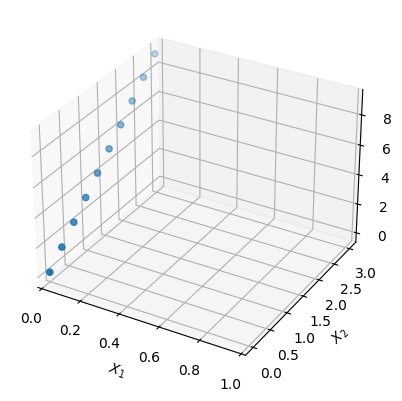

In [528]:
ax = plt.figure().add_subplot(projection='3d')
Y = np.linspace(0, 3, 10)
Z = 3*Y
X = np.zeros(10)
ax.scatter(X, Y, Z)
plt.xlim(0, 1)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$');


### Problem 3

In [606]:
fattrain = pd.read_csv('fattrain.csv')
#Make first column the index
fattrain.set_index('Unnamed: 0', inplace = True)
fattrain.index.name = None

fattest = pd.read_csv('fattest.csv')
fattest.set_index('Unnamed: 0', inplace = True)
fattest.index.name = None


In [604]:
DataFinal = fattest
fitstr = "brozek ~ "
for i in range(len(DataFinal.columns[1:])):
    fitstr += DataFinal.columns[i+1] + " + "
fitstr = fitstr[:-3]
print(fitstr)

brozek ~ age + weight + height + adipos + neck + chest + abdom + hip + thigh + knee + ankle + biceps + forearm + wrist


In [591]:
predictors = fattrain.columns.drop(['brozek'])
X_fat = MS(predictors).fit_transform(fattrain)
y_train = fattrain['brozek']
model = sm.OLS(y_train, X_fat)
# Fit the model
result = model.fit()
# Display and interpret results
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 brozek   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     23.72
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           6.13e-27
Time:                        17:49:11   Log-Likelihood:                -341.63
No. Observations:                 125   AIC:                             713.3
Df Residuals:                     110   BIC:                             755.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -70.6293     43.172     -1.636      0.1

Predictor abdom has the smallest P-value of 0.000. 

#### part b)

In [896]:
FullFat = pd.concat([fattrain, fattest], axis = 0)

In [897]:
#p. 279 ISLP
design = MS(FullFat.columns.drop('brozek')).fit(FullFat)
Y = np.array(FullFat['brozek'])
X = design.transform(FullFat)
D = design.fit_transform(FullFat)
D = D.drop('intercept', axis = 1)
X = np.asarray(D)
# Y = np.array(FullFat['brozek'])
lambdas = 10**np.linspace(8, -2, 100) / Y.std()

In [898]:
outer_valid = skm.ShuffleSplit(n_splits = 1,
                               test_size = 0.25,
                               random_state = 1)
inner_cv = skm.KFold(n_splits = 5,
                        shuffle = True,
                        random_state = 2)
ridgeCV = skl.ElasticNetCV(alphas = lambdas,
                           l1_ratio = 0,
                           cv = inner_cv)
pipeCV = Pipeline(steps = [('scaler', scaler),
                           ('ridge', ridgeCV)])


In [907]:
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

In [913]:
%%capture 
#^^Suppresses output, I get lots of convergence warnings
results = skm.cross_validate(pipeCV,
                                X,
                                Y,
                                cv = outer_valid,
                                return_train_score = True,
                                return_estimator = True)


In [911]:
#Everything is conviently stored in the results dictionary. We get lambda
results['estimator'][0].named_steps['ridge'].alpha_

0.005236949524653777

In [644]:
#And training and test scores
print("Training MSE: ", results['train_score'][0])
print("Test MSE:     ", results['test_score'][0])

Training MSE:  0.77424526896824
Test MSE:      0.6344710131495268


#### part c)

In [855]:
design = MS(fattrain.columns.drop('brozek')).fit(fattrain)
Y = np.array(fattrain['brozek'])
X = design.transform(fattrain)
D = design.fit_transform(fattrain)
D = D.drop('intercept', axis = 1)
X = np.asarray(D)
# Y = np.array(FullFat['brozek'])
lambdas = 10**np.linspace(8, -2, 100) / Y.std()

In [864]:
K = 5
kfold = skm.KFold(K, random_state = 0, shuffle = True) 
lassoCV = skl.ElasticNetCV(n_alphas = 100,
                           l1_ratio = 1,
                           cv = kfold)
pipeCV = Pipeline(steps = [('scaler', scaler),
                            ('lasso', lassoCV)])
pipeCV.fit(X,Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

0.23053963612161377

In [857]:
Xs =  X - X.mean(0)[None, :]
X_scale = X.std(0)
Xs = Xs / X_scale[None, :]
lambdas, soln_array = skl.Lasso.path(Xs,
                                     Y,
                                    l1_ratio = 1,
                                    n_alphas = 100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns = D.columns,
                         index = -np.log(lambdas))

In [865]:
results = skm.cross_validate(pipeCV,
                                X,
                                Y,
                                cv = outer_valid,
                                return_train_score = True,
                                return_estimator = True)
results

{'fit_time': array([0.21859908]),
 'score_time': array([0.00549483]),
 'estimator': [Pipeline(steps=[('scaler', StandardScaler()),
                  ('lasso',
                   ElasticNetCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                                l1_ratio=1))])],
 'test_score': array([0.63851993]),
 'train_score': array([0.78976804])}

In [859]:
#No matter what i do, i get insane testing errors and idk why
Y = fattest['brozek']
X = fattest.drop('brozek', axis = 1)
print(np.mean((Y - np.sum(np.asarray(X)*tuned_lasso.coef_, axis = 1))**2))


412668.04764974373

In [860]:
yhat = tuned_lasso.predict(fattest[fattest.columns.drop('brozek')])
TestMSE = np.mean((fattest['brozek'] - yhat)**2)
print(TestMSE)

437019.72282974067


c:\Users\chril\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(


#### part d)

In [885]:
# Found on google
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    # X = 
    model = sm.OLS(fattrain['brozek'], sm.add_constant(fattrain[list(feature_set)]))
    regr = model.fit()
    RSS: float = ((regr.predict((sm.add_constant(fattrain[list(feature_set)])) ) - fattrain['brozek'])**2).sum()
    MSEtest: float = ((regr.predict((sm.add_constant(fattest[list(feature_set)])) ) - fattest['brozek'])**2).mean()
    # print(regr.summary())
    return {"model": regr, "RSS": RSS, "MSEtest": MSEtest}

def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(fattrain.loc[:, fattrain.columns != 'brozek'].columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [886]:
#Also from google
models_best = pd.DataFrame(columns=["RSS", "model", "MSEtest"])

tic = time.time()
for i in range(len(fattrain.columns)):
    models_best.loc[i] = getBest(i)
 
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")


Processed 1 models on 0 predictors in 0.01485300064086914 seconds.
Processed 14 models on 1 predictors in 0.2512657642364502 seconds.
Processed 91 models on 2 predictors in 1.4613239765167236 seconds.
Processed 364 models on 3 predictors in 6.66951060295105 seconds.
Processed 1001 models on 4 predictors in 18.602158784866333 seconds.
Processed 2002 models on 5 predictors in 40.8828489780426 seconds.
Processed 3003 models on 6 predictors in 66.42443752288818 seconds.
Processed 3432 models on 7 predictors in 81.20971345901489 seconds.
Processed 3003 models on 8 predictors in 75.13678860664368 seconds.
Processed 2002 models on 9 predictors in 52.2716019153595 seconds.
Processed 1001 models on 10 predictors in 27.544811964035034 seconds.
Processed 364 models on 11 predictors in 10.757773399353027 seconds.
Processed 91 models on 12 predictors in 3.682547092437744 seconds.
Processed 14 models on 13 predictors in 0.42160487174987793 seconds.
Processed 1 models on 14 predictors in 0.0429000854

In [887]:
models_best.apply(lambda row: row[1].params, axis=1) # get the parameters of the best model for each number of predictors


,abdom,adipos,age,ankle,biceps,chest,const,forearm,height,hip,knee,neck,thigh,weight,wrist
0,NaN,NaN,NaN,NaN,NaN,NaN,18.781600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.526763,NaN,NaN,NaN,NaN,NaN,-29.895486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.805072,NaN,NaN,NaN,NaN,NaN,-35.449889,NaN,NaN,NaN,NaN,NaN,NaN,-0.113528,NaN
3,0.827880,NaN,NaN,NaN,NaN,NaN,-45.323101,0.433743,NaN,NaN,NaN,NaN,NaN,-0.139340,NaN
4,0.756796,NaN,NaN,NaN,NaN,NaN,-5.389972,0.573533,NaN,NaN,-0.818698,-0.810143,NaN,NaN,NaN
5,0.708115,NaN,0.070112,NaN,NaN,NaN,-10.865730,0.705632,NaN,NaN,-0.774783,-0.773270,NaN,NaN,NaN
6,0.696413,NaN,0.086381,NaN,NaN,NaN,-5.860424,0.872913,NaN,NaN,-0.623173,-0.596064,NaN,NaN,-1.208171
7,0.632649,NaN,0.123535,NaN,NaN,NaN,-6.800213,0.882043,NaN,NaN,-0.864268,-0.649408,0.280307,NaN,-1.227800
8,0.683125,NaN,0.113415,NaN,NaN,NaN,-3.956286,0.830414,NaN,-0.172499,-0.783077,-0.644976,0.378781,NaN,-1.088834
9,0.682923,NaN,0.113580,NaN,0.178644,NaN,-2.223757,0.756100,NaN,-0.189612,-0.791770,-0.691433,0.355096,NaN,-1.096363


In [888]:
rsquare = models_best.apply(lambda row: row[1].rsquared_adj, axis=1) # get the R^2 of the best model for each number of predictors
bic = models_best.apply(lambda row: row[1].bic, axis=1) # get the BIC of the best model for each number of predictors
aic = models_best.apply(lambda row: row[1].aic, axis=1) # get the Mallow's Cp of the best model for each number of predictors


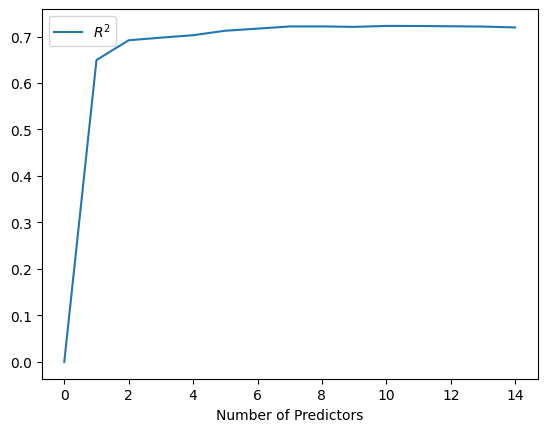

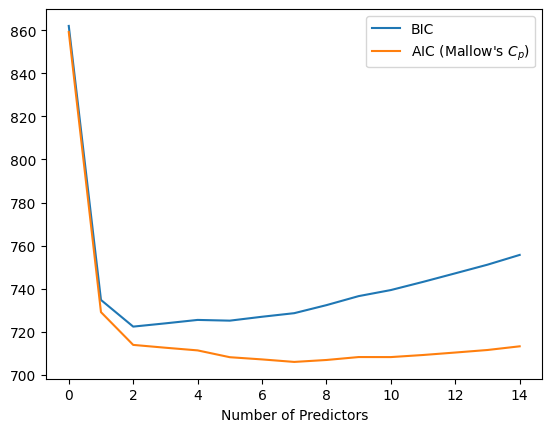

In [889]:
plt.plot(rsquare, label="$R^2$")
plt.legend()
plt.xlabel('Number of Predictors')
plt.show()

plt.plot(bic, label="BIC")
plt.plot(aic, label="AIC (Mallow's $C_p$)")
plt.legend()
plt.xlabel('Number of Predictors');

In [890]:
print(bic.idxmin()) #Finds where minimum  and maximum values are
models_best.loc[bic.idxmin(), "model"].params #Coefficients of the best model

2


const    -35.449889
weight    -0.113528
abdom      0.805072
dtype: float64

In [891]:
print("Training MSE")
models_best['RSS']/len(fattrain) #MSE of the best model for each number of predictors

Training MSE


0     55.657181
1     19.356918
2     16.867877
3     16.426438
4     16.006688
5     15.358512
6     14.991919
7      14.61687
8     14.488693
9     14.414901
10    14.184297
11    14.067825
12    13.971875
13    13.880071
14    13.848003
Name: RSS, dtype: object

In [892]:
print("Test MSE")
models_best['MSEtest'] #MSE of the best model for each number of predictors

Test MSE


0     63.184023
1     21.676359
2      17.54809
3      17.47053
4      20.24854
5     20.525992
6     19.293303
7     19.853054
8     19.076534
9     19.248473
10    19.967819
11    19.725981
12    19.844031
13    19.984394
14    19.962932
Name: MSEtest, dtype: object

In [893]:
np.min(models_best['MSEtest']) #Lowest test MSE

17.470530486940454

seems to be a fair bit higher than in a) and b), maybe I did something wrong or it is beacuse the data is normalized in the others. \
Both models in a) and b) have almost the same, low, training error, which is good since they are computationally easy.